# **Pilot Project: Cigar Detection from images (using YOLOv7)**
**[Objective of Pilot Study]**

1.   Overview: How is social media influencing people to take up cigars? Can we do something to block the chain?
2. Use Computer Vision to detect cigars in images (Also test with noise data: cigarettes/vapes/pens)
3. Is there a corelation between objects in the images (e.g alcohol glass next to cigar/ hand holding the cigar)


**[Final deliverables]**

1.   Table depicting the model metrics (F1, P-R etc.)
2.   Method/Results

# --------------------- **[Methodology]** ---------------------


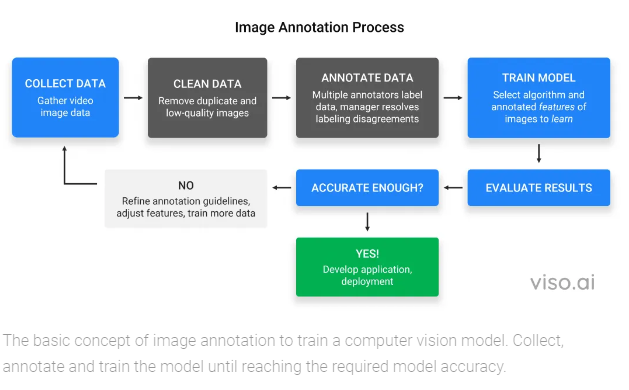


**[Data Collection]**

* Ground Truth Data: Scraping images from subreddits: r/cigars, and resizing them to decrease their resolution (the model take longer to train on very large sized images)
* Noise Data: pens/cigarettes/vapes etc.

[Reference video for scraping Reddit images](https://www.youtube.com/watch?v=sEIv8UcR3Go)
1.	From my Reddit user account, link used for developer mode: https://www.reddit.com/prefs/apps
2.	“redirect uri”: http://localhost
3.	Client id: CxYuVD9eqn7MSB96p-iuQA
4.	Client secret: Bix79KOMrBUjaPFqK1gHfGC5uHVtUg

[Link to image scraper code](https://github.com/keshariS/imageScrapers)

Finally, about 700 raw images were scraped

**[Image Annotation]** 

 * Tool: labelImg (anaconda prompt: > pip install labelImg > labelImg) opens up the GUI 

* Mia cleaned and annotated the raw images that were scraped. Fianlly about 295 good images were ready to be used for training.



---

[Reference video for training yolov7 on Colab for object detection](https://www.youtube.com/watch?v=_fXABNYlZhY&list=PLUE9cBml08yiahlgN1BDv_8dAJFeCIR1u&index=5)

# **Annotated cigar dataset (295 images) split used for Colab training: 245 train / 50 val**

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Download yolov7 repo and cd into that directory

%cd /content/gdrive/MyDrive
import os
if not os.path.isdir("ColabSpace"):
  os.makedirs("ColabSpace")
%cd ColabSpace
# uncomment below if running first time:
# !git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7

/content/gdrive/MyDrive
/content/gdrive/MyDrive/ColabSpace
/content/gdrive/MyDrive/ColabSpace/yolov7


In [ ]:
# Downloading the pre-trained weights from the official repo

# !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

# use the one below
# !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

# Start Training

**Note**

[To get the full list of training arguments follow the link](https://github.com/WongKinYiu/yolov7/blob/main/train.py)

Some important arguments to know
- **configuration**: In the main yolov7 folder go to cfg/training folder and select the path of appropriate configuration file. Give the relative path to the file in **--cfg** argument
- **data**: the path to data folder, it will be automatically catered 
- **weights**: path to pretrained weights given by **--weights** argument
- **freeze**: freezes the given number of layers
- **hyp**: hyperparameter file specifying learning rates (initial 0.01, final 0.01*0.01 = 0.0001 used)


<br>

**Note for resuming training from checkpoint** <br>
By default, the checkpoints for the epoch are stored in folder, yolov7/runs/train, give the relative path to last epoch checkpoints

# [Training 1]: Unfrozen model with 100 epochs and yolov7.pt weights:
# Unsatisfactory results

In [ ]:
# !python train.py --device 0 --batch-size 4 --epochs 100 --img 640 640 --data data/cigar_data.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7-cigar.yaml --weights yolov7.pt --name yolov7-cigar-unfrozen

# [Training 2]: Freeze first 50 layers (backbone), 200 epochs, yolov7_training.pt weights
# Good results (training completed in 0.8 hours)

In [ ]:
# !python train.py --device 0 --batch-size 4 --data data/cigar_data.yaml --img 640 640 --cfg cfg/training/yolov7-cigar.yaml --weights yolov7_training.pt --hyp data/For_Cigar.yaml --epochs 200 --freeze 50 --name yolov7_frozen50
# if runtime closes, to continue training from last trained weights use this weights argument: --weights runs/train/yolov7_frozen50/weights/last.pt

# [Training 3]: Freeze first 50 layers (backbone), 200 epochs, yolov7_training.pt weights, Noise Data included (vapes, cigarettes, pens)
# Total 1126 images = (594 + 250 noise = 844) train + 136 val + 146 test
# Good results? (training completed in 2.2 hours)

In [ ]:
# !python train.py --device 0 --batch-size 4 --data data/cigar_data.yaml --img 640 640 --cfg cfg/training/yolov7-cigar.yaml --weights yolov7_training.pt --hyp data/For_Cigar.yaml --epochs 200 --freeze 50 --name yolov7_frz50_noise
# if runtime closes, to continue training from last trained weights use this weights argument: --weights runs/train/yolov7_frozen50/weights/last.pt

YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7-cigar.yaml', data='data/cigar_data.yaml', device='0', entity=None, epochs=200, evolve=False, exist_ok=False, freeze=[50], global_rank=-1, hyp='data/For_Cigar.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7_frz50_noise', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7_frz50_noise', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, v5_metric=False, weights='yolov7_training.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup

# [Training 4]: Train for 2 classes - cigar/cigar_box

.

.

.

# ---------------------- **[Results]** ----------------------

# F1 and PR curves

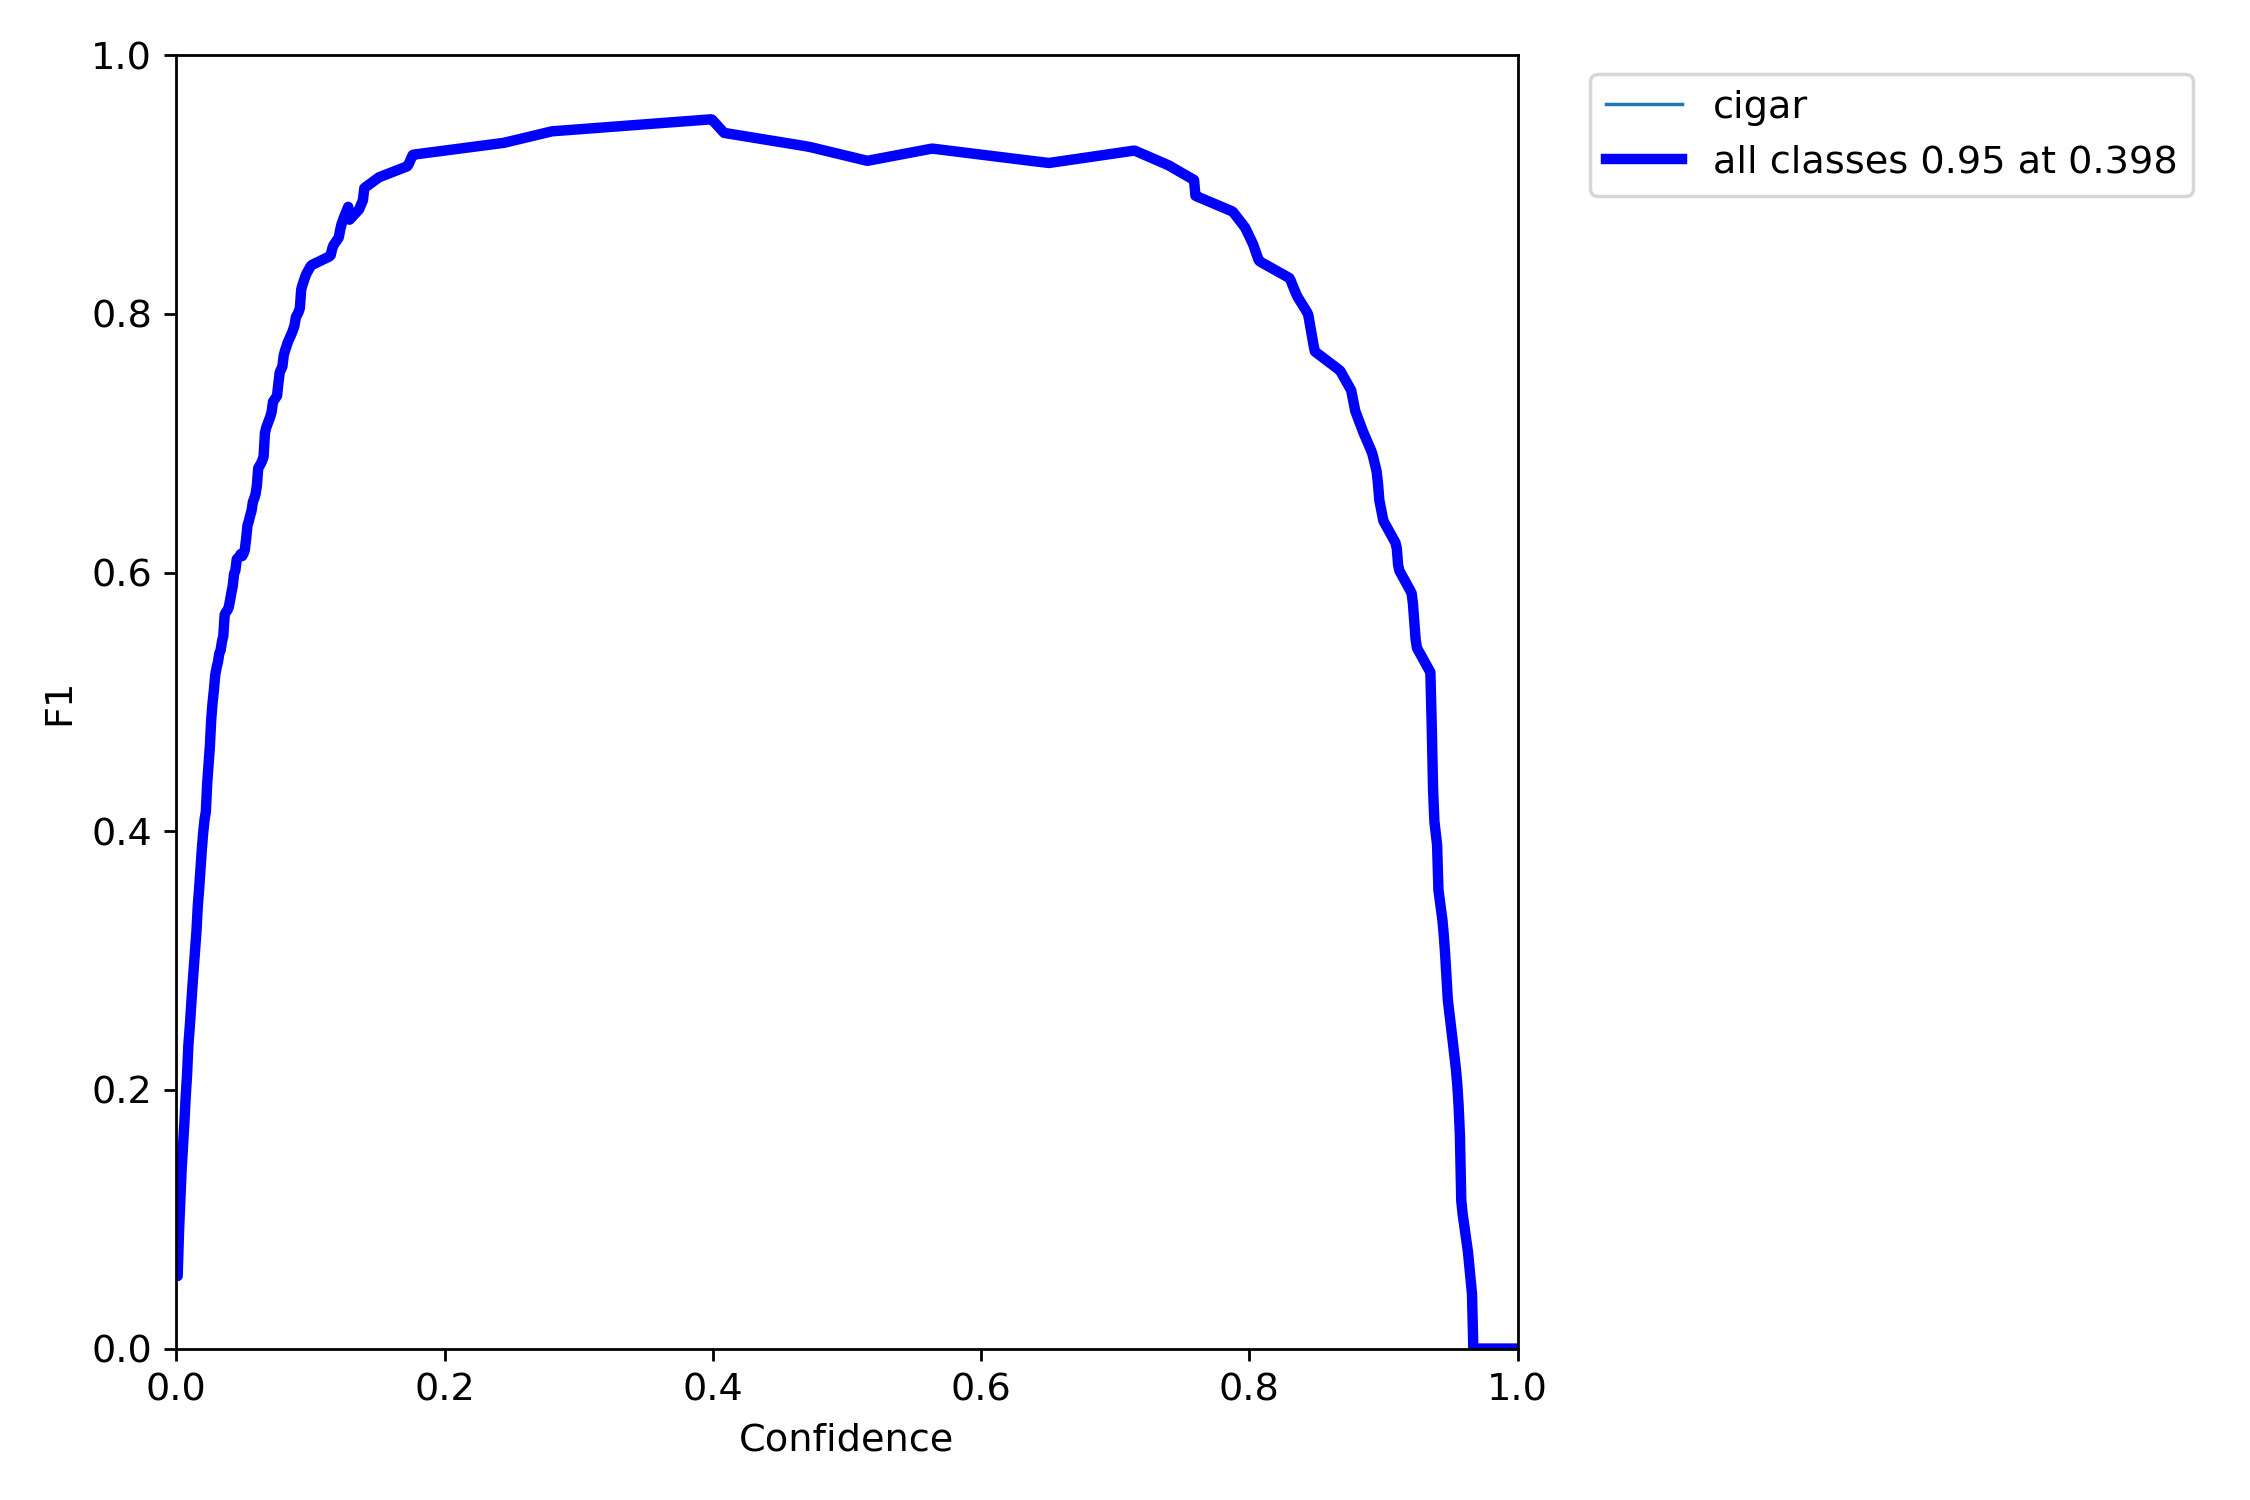

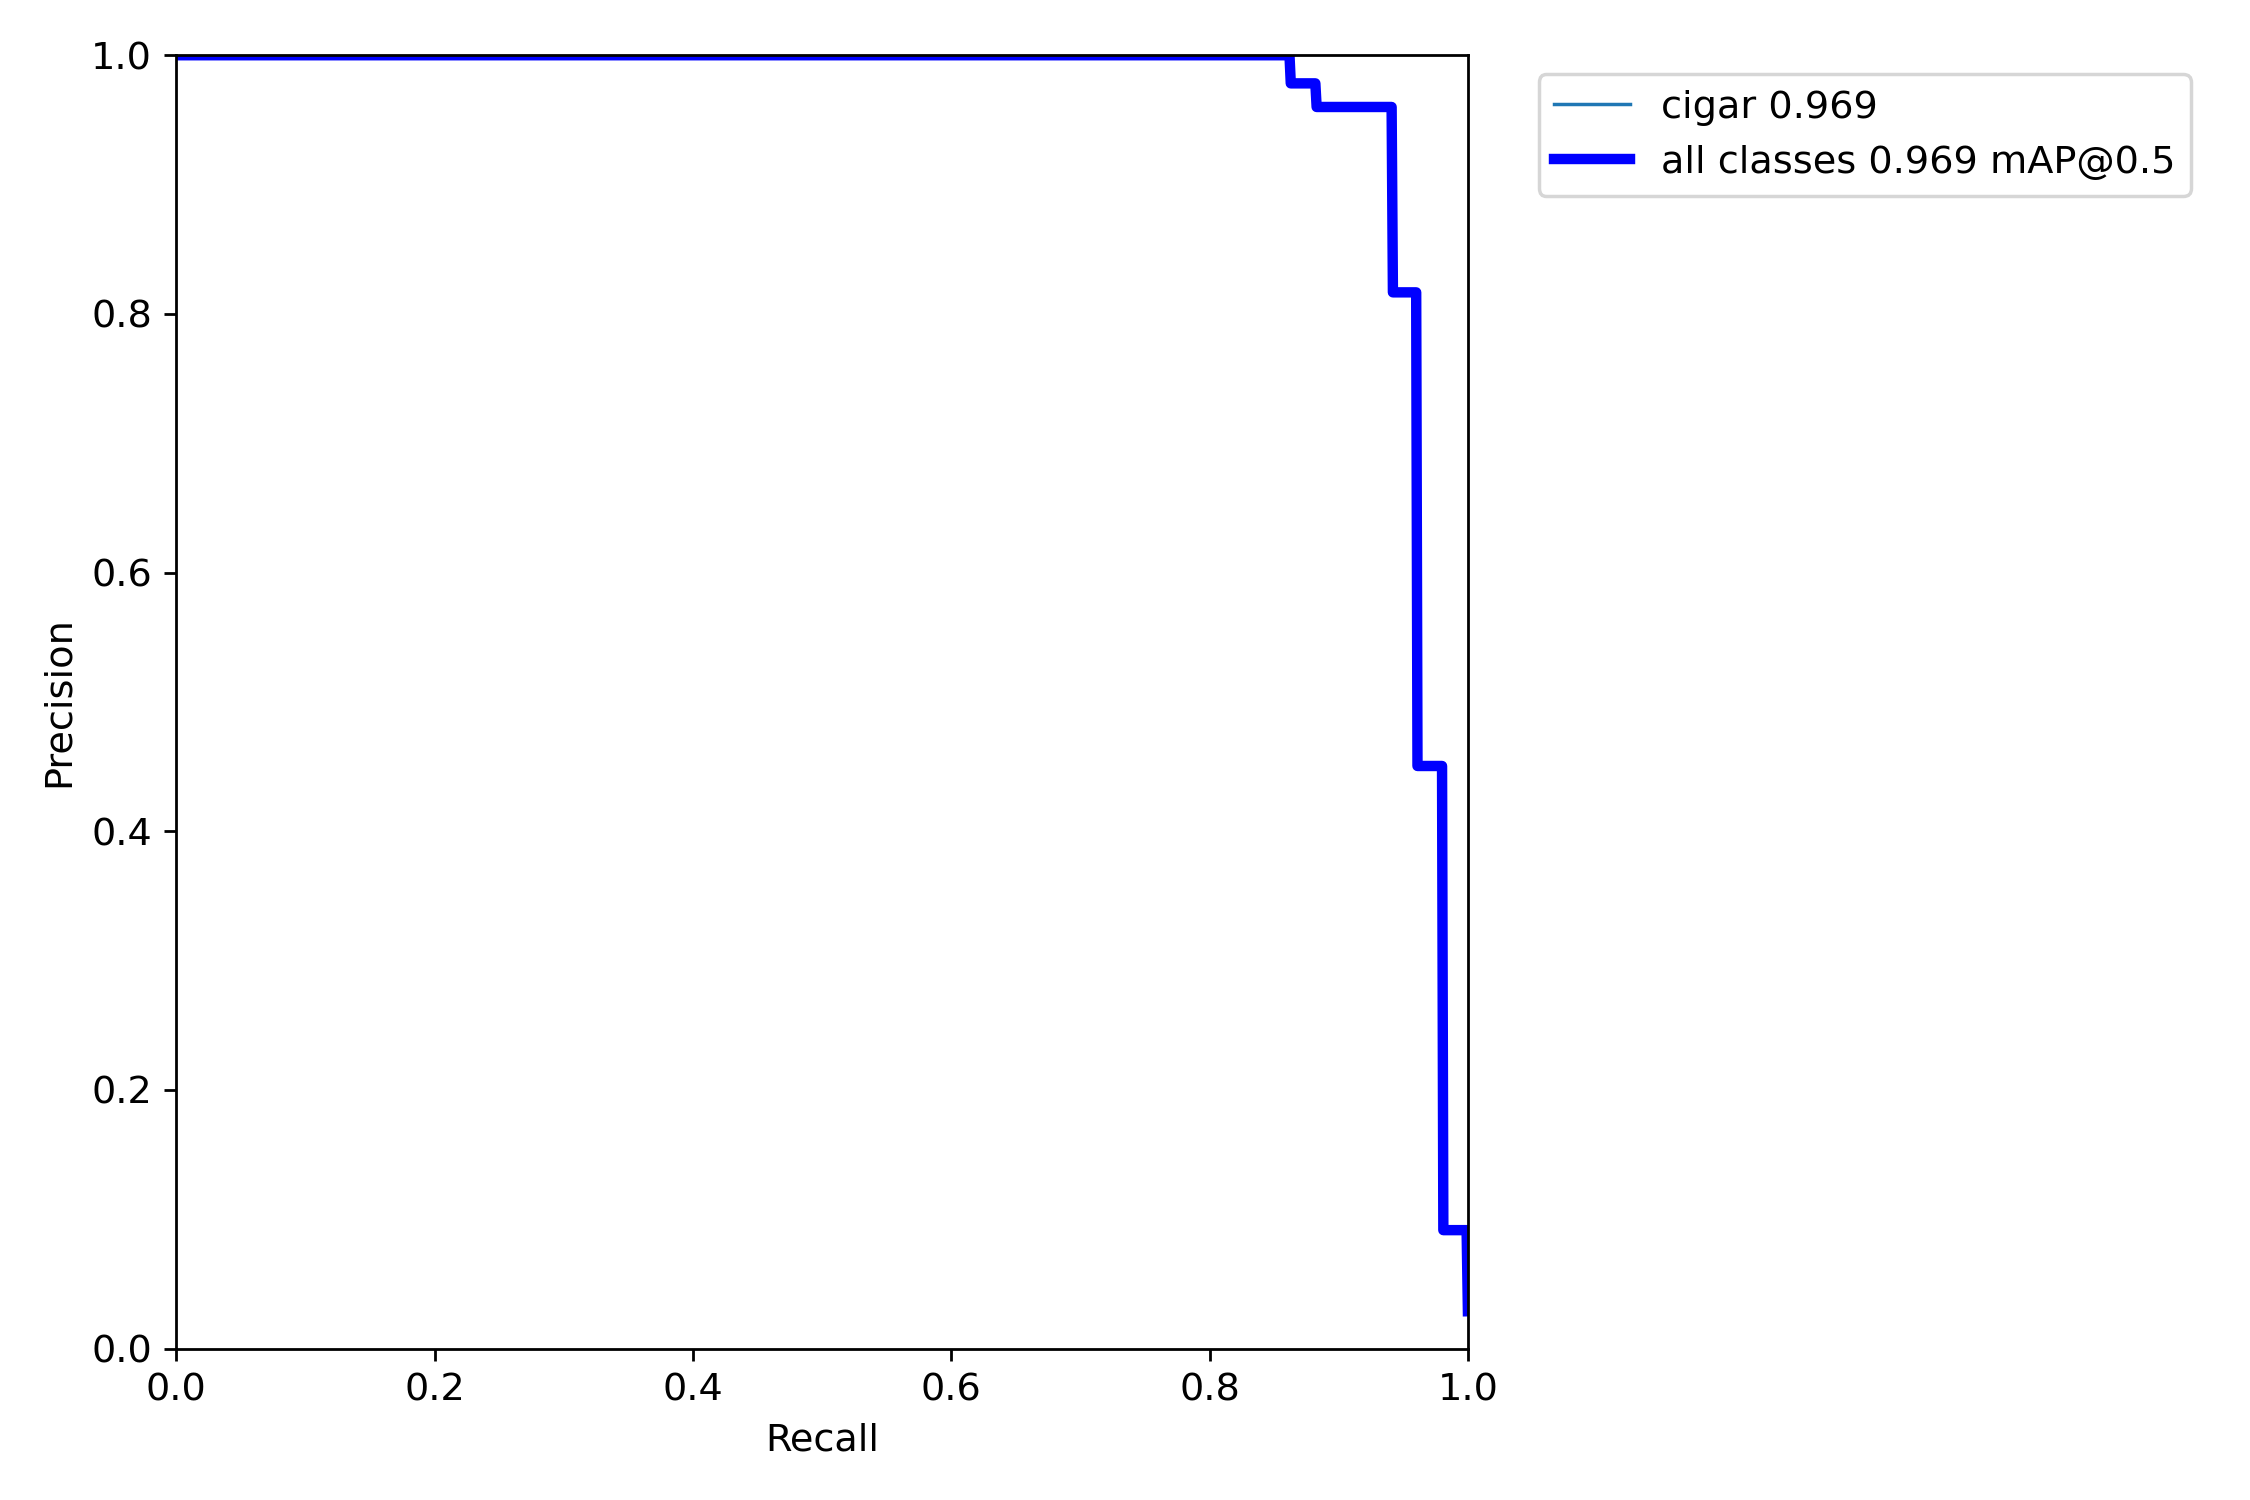

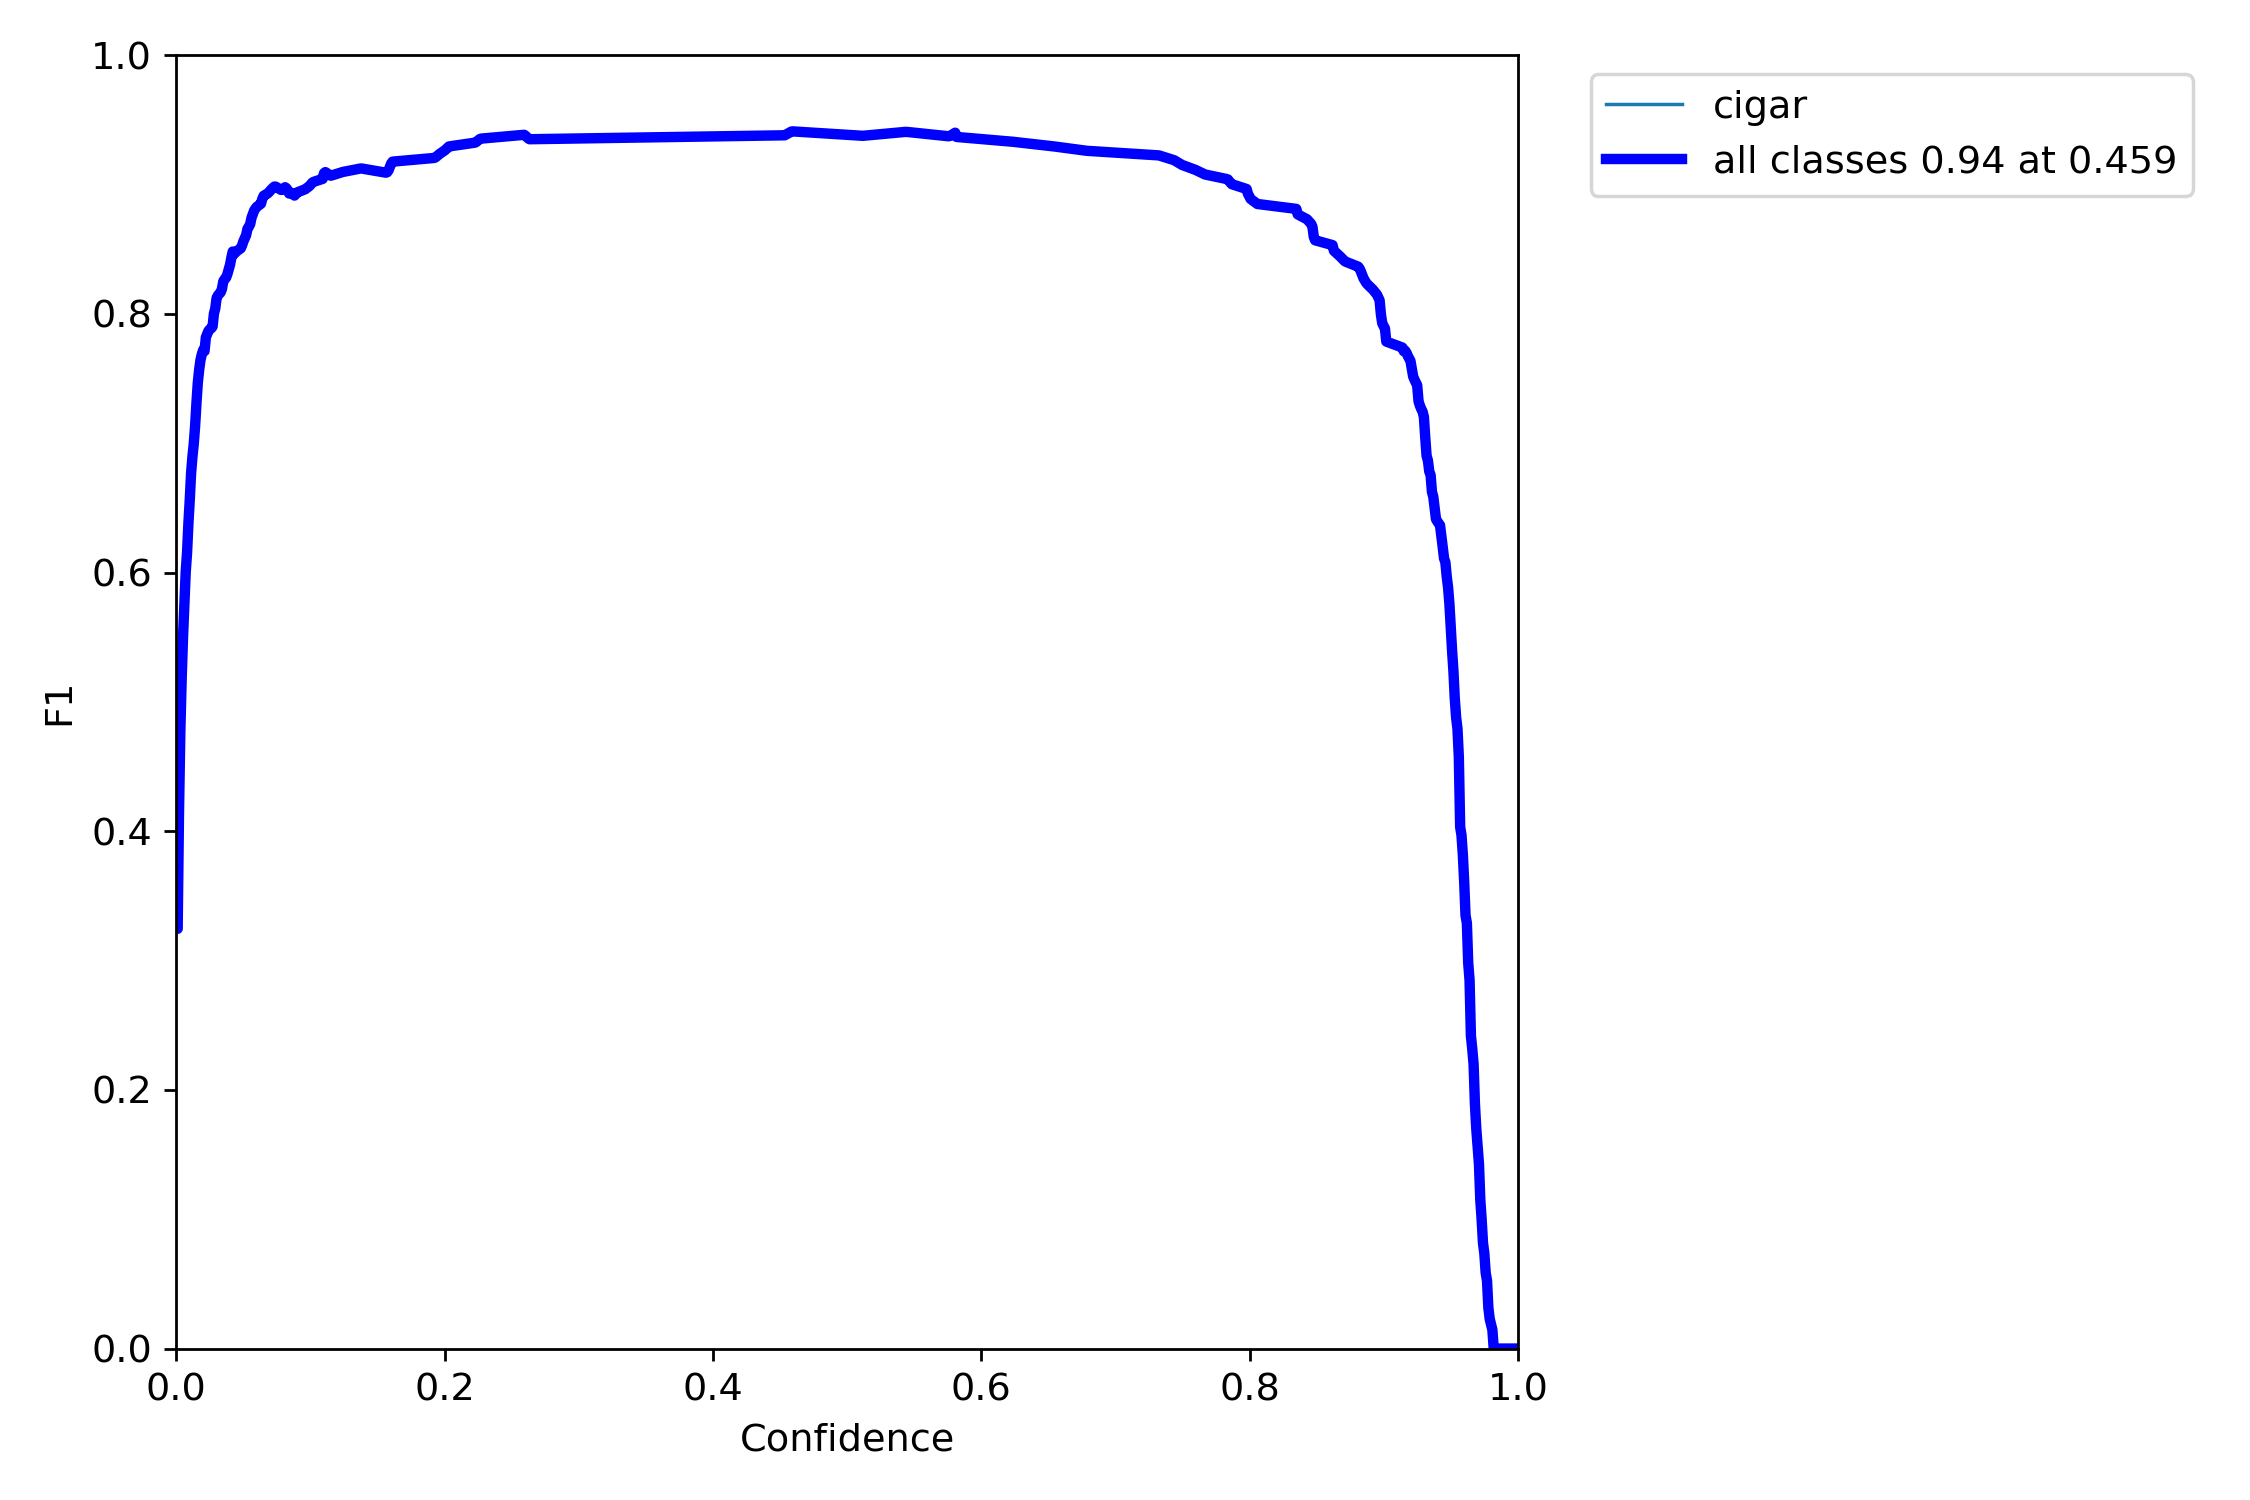

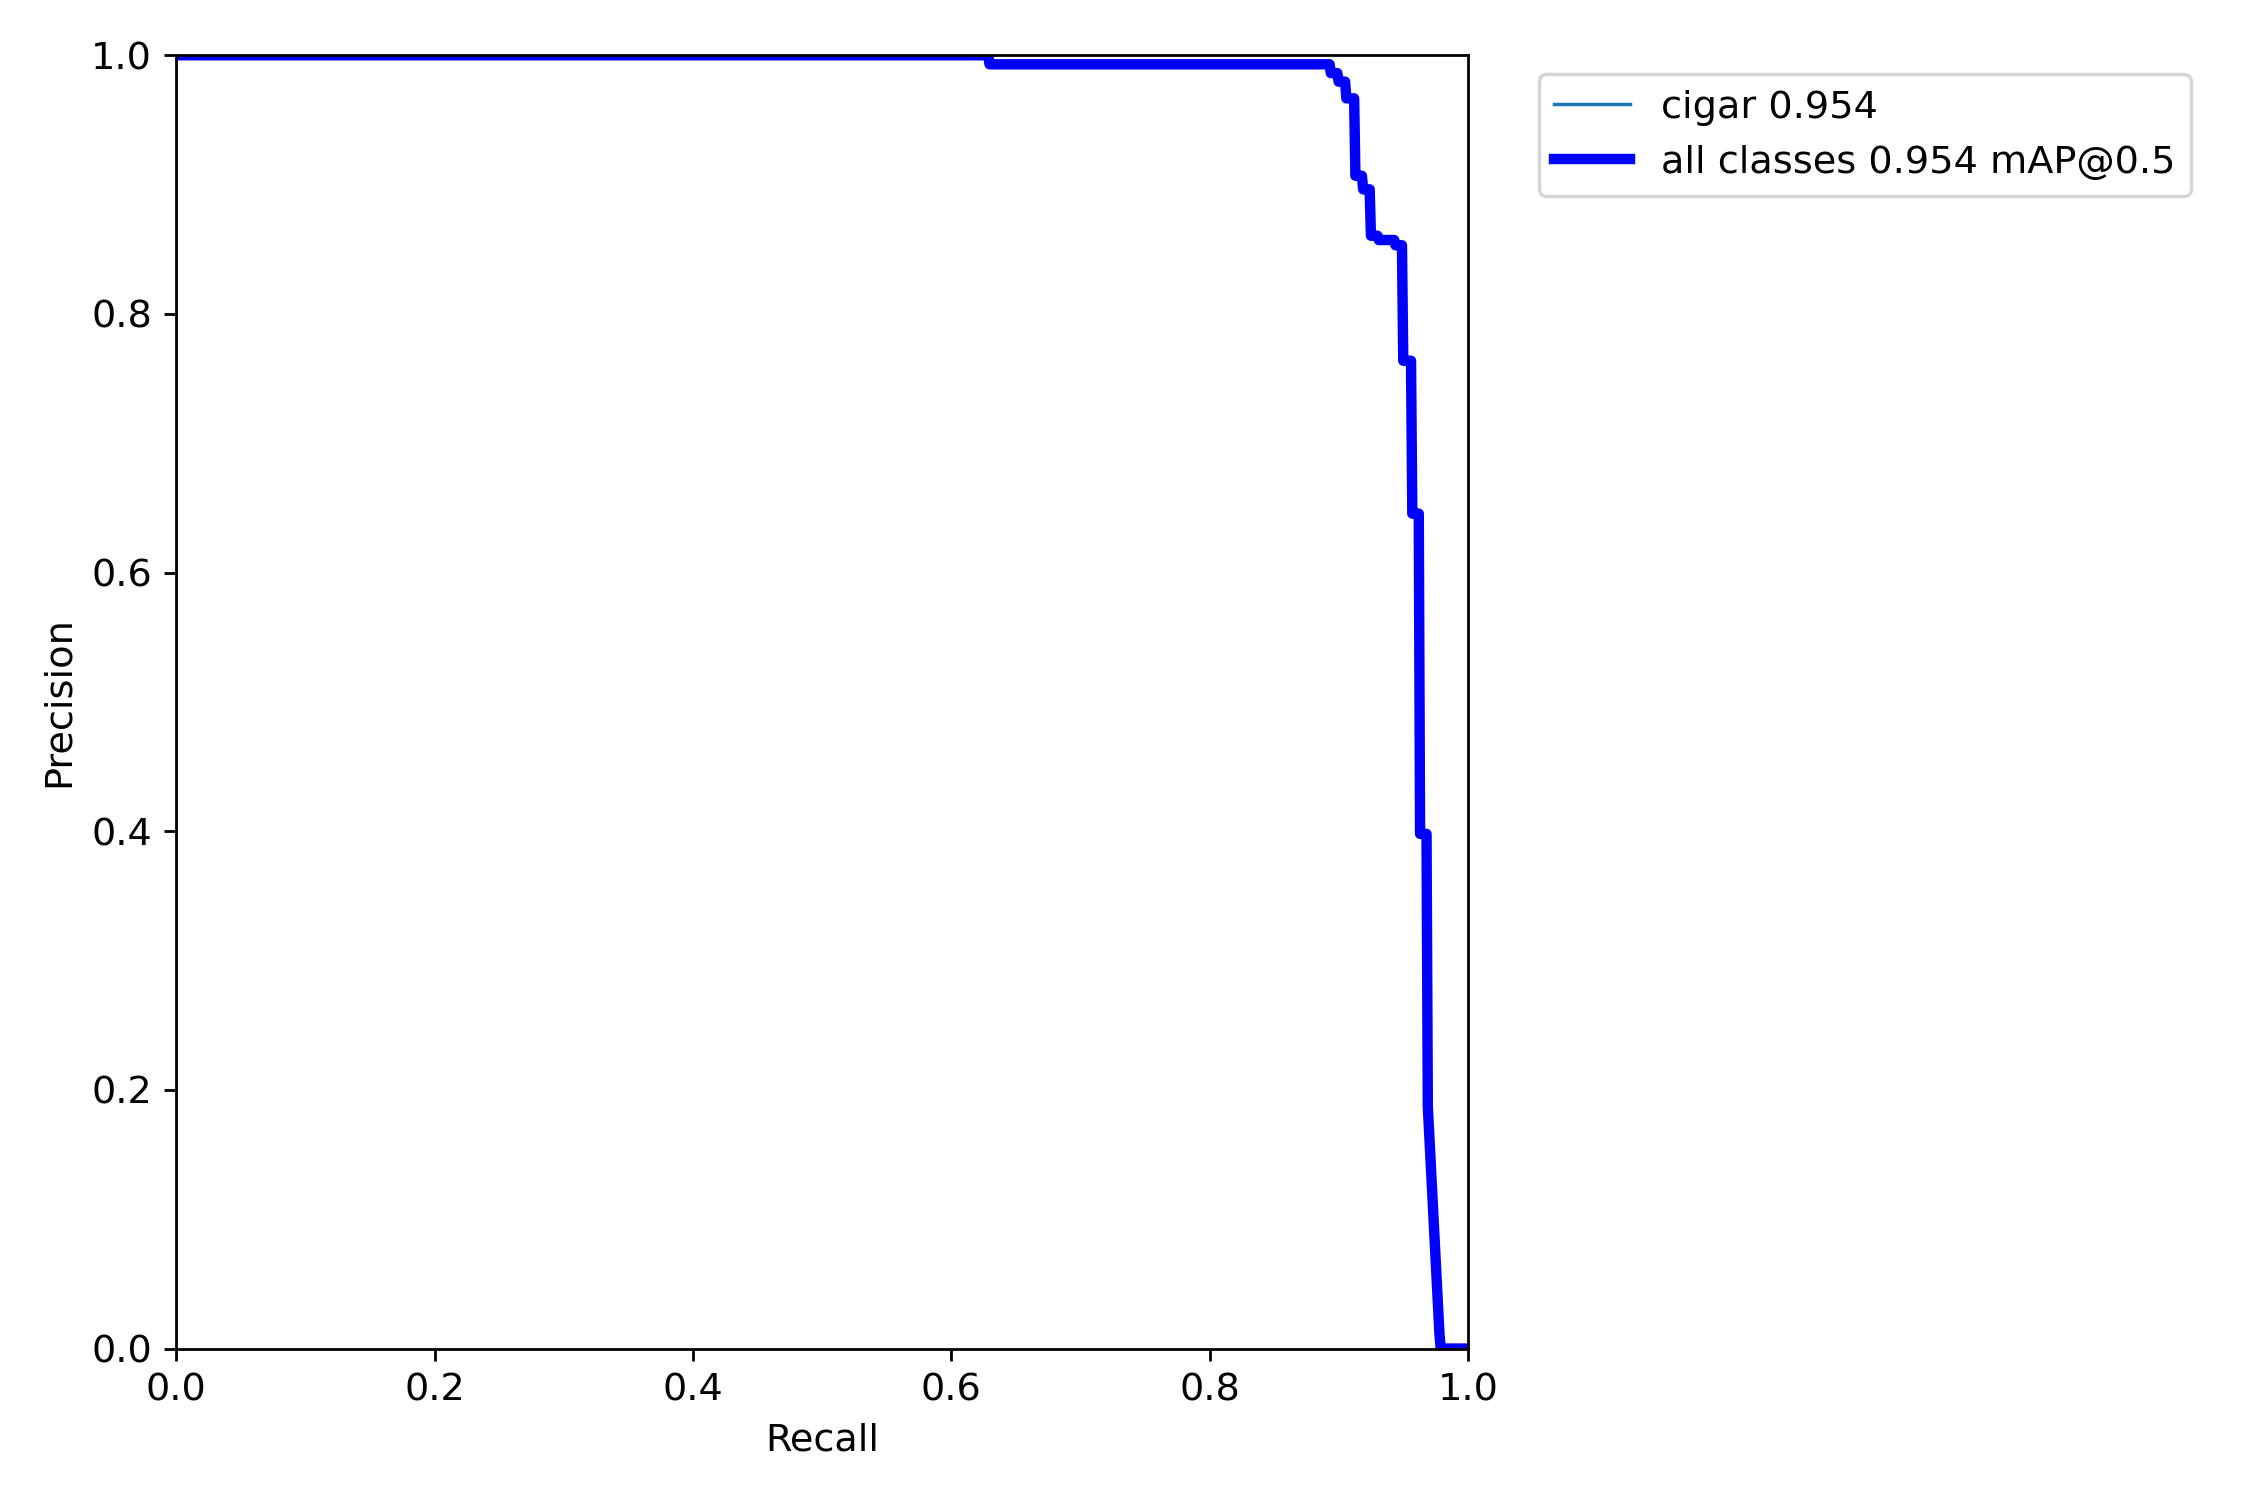

In [ ]:
from IPython.display import Image
size = 400
display(Image("runs/train/yolov7_frozen50/F1_curve.png", width=size, height=size))
display(Image("runs/train/yolov7_frozen50/PR_curve.png", width=size, height=size))
display(Image("runs/train/yolov7_frz50_noise/F1_curve.png", width=size, height=size))
display(Image("runs/train/yolov7_frz50_noise/PR_curve.png", width=size, height=size))

# P and R curves

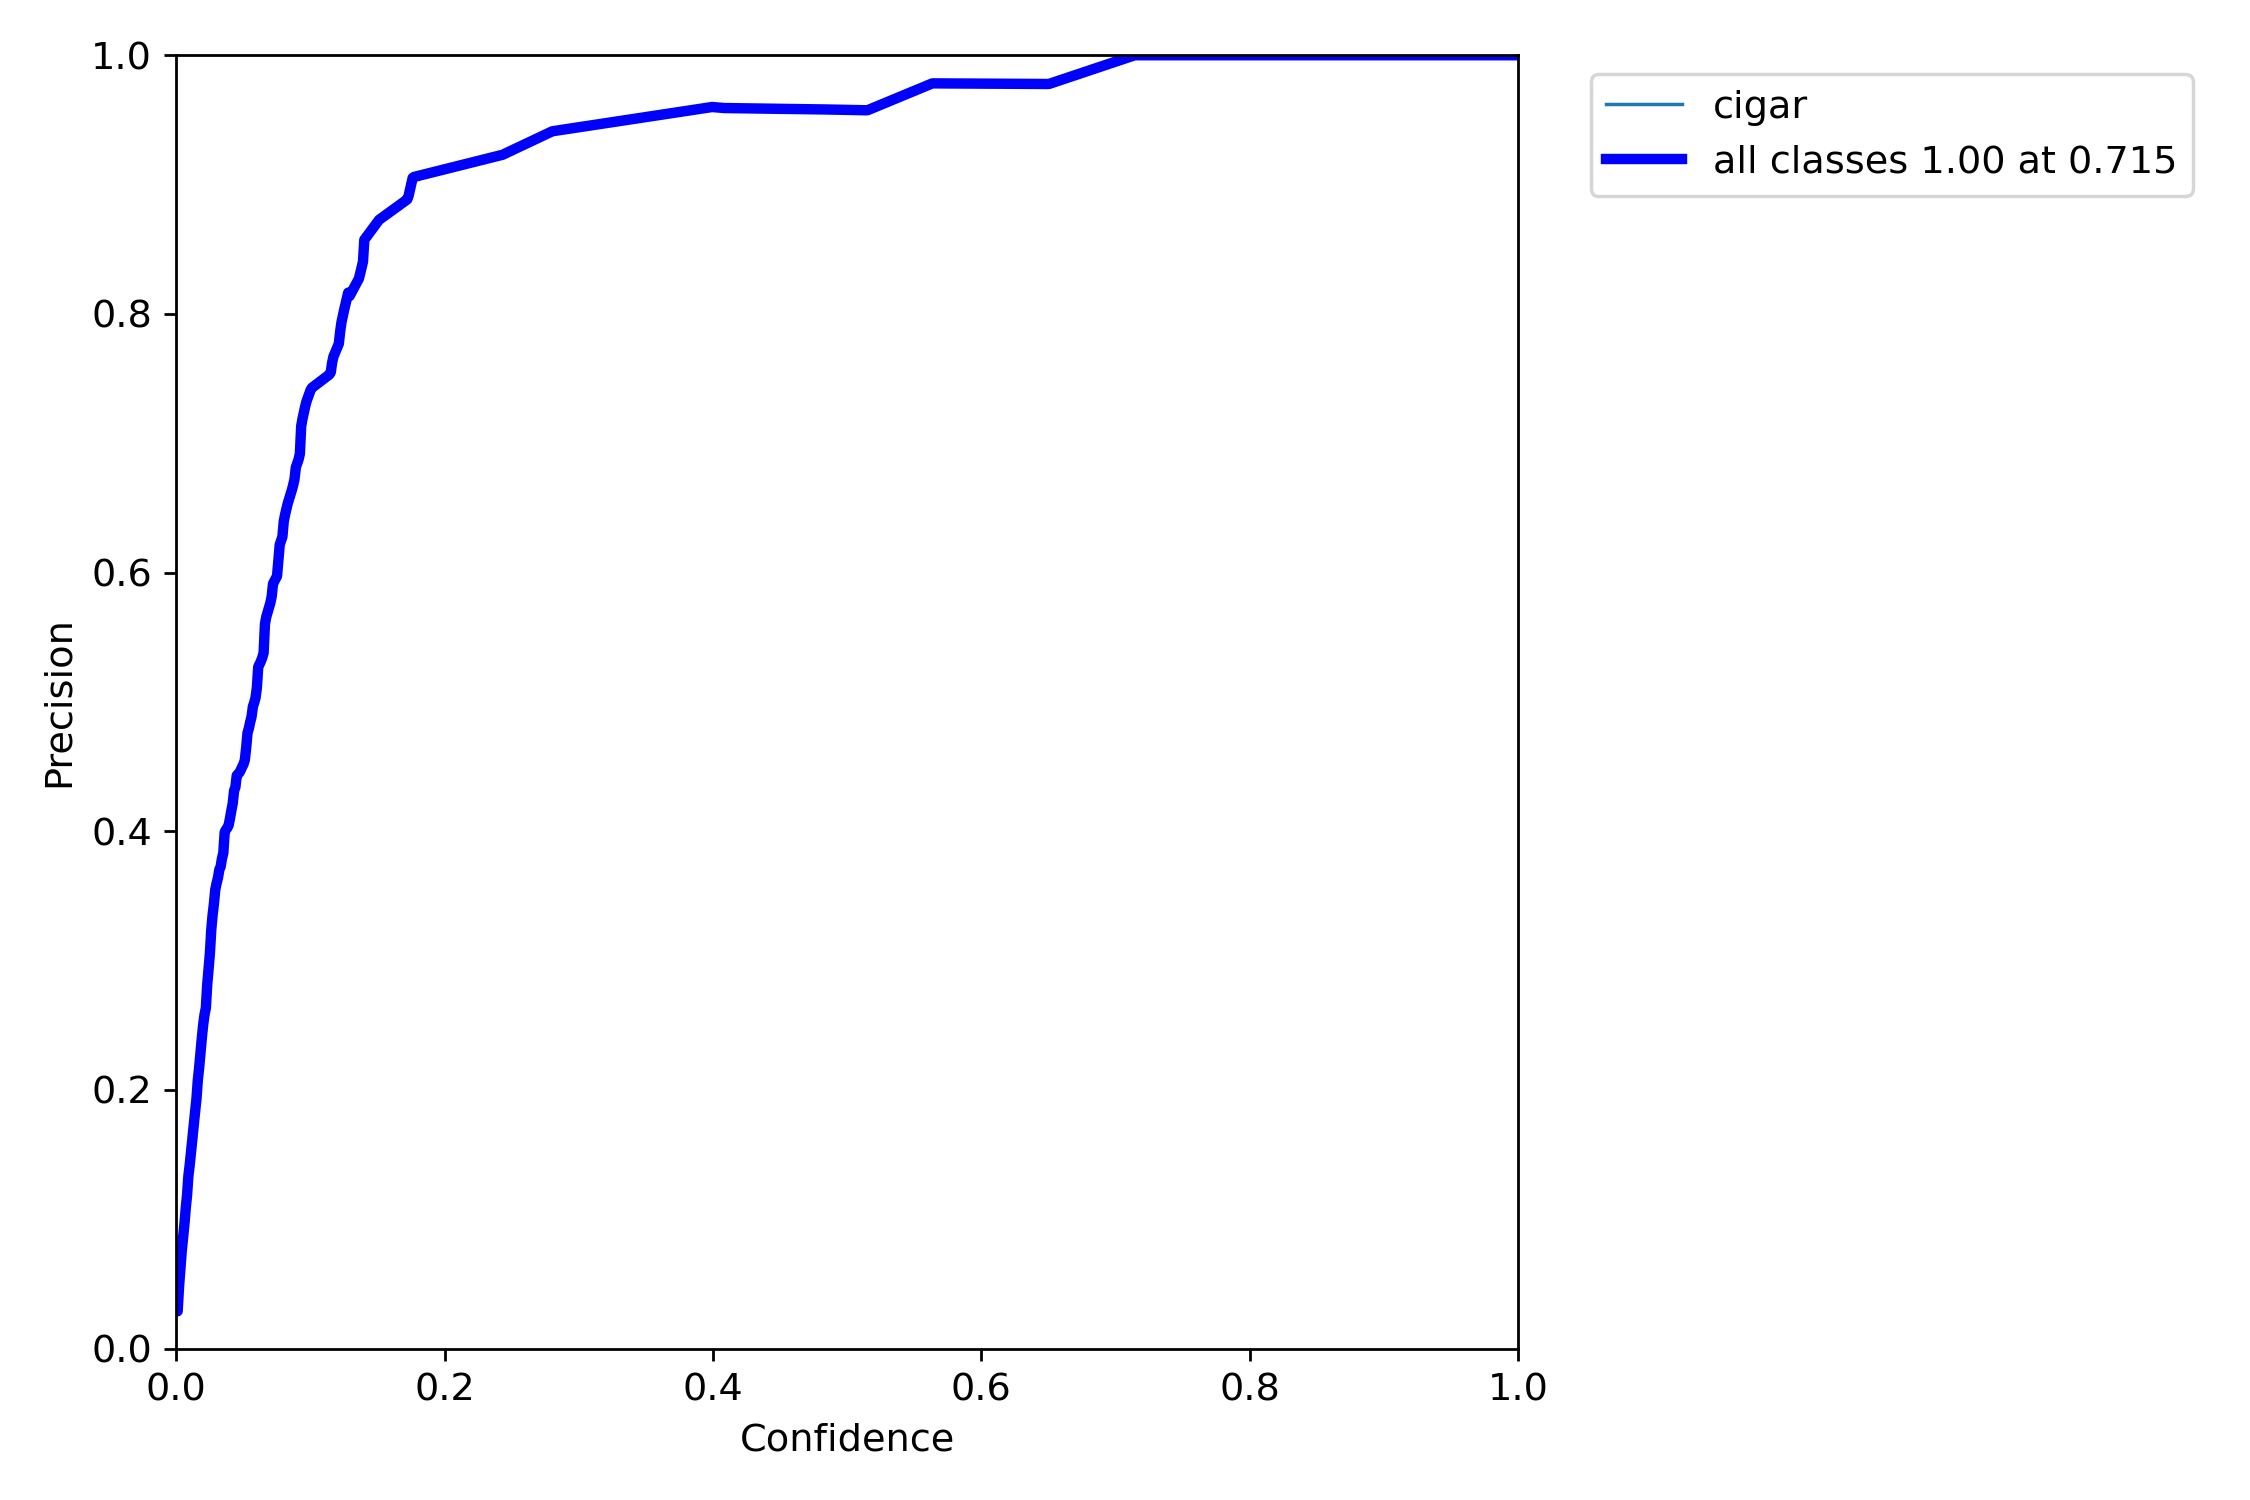

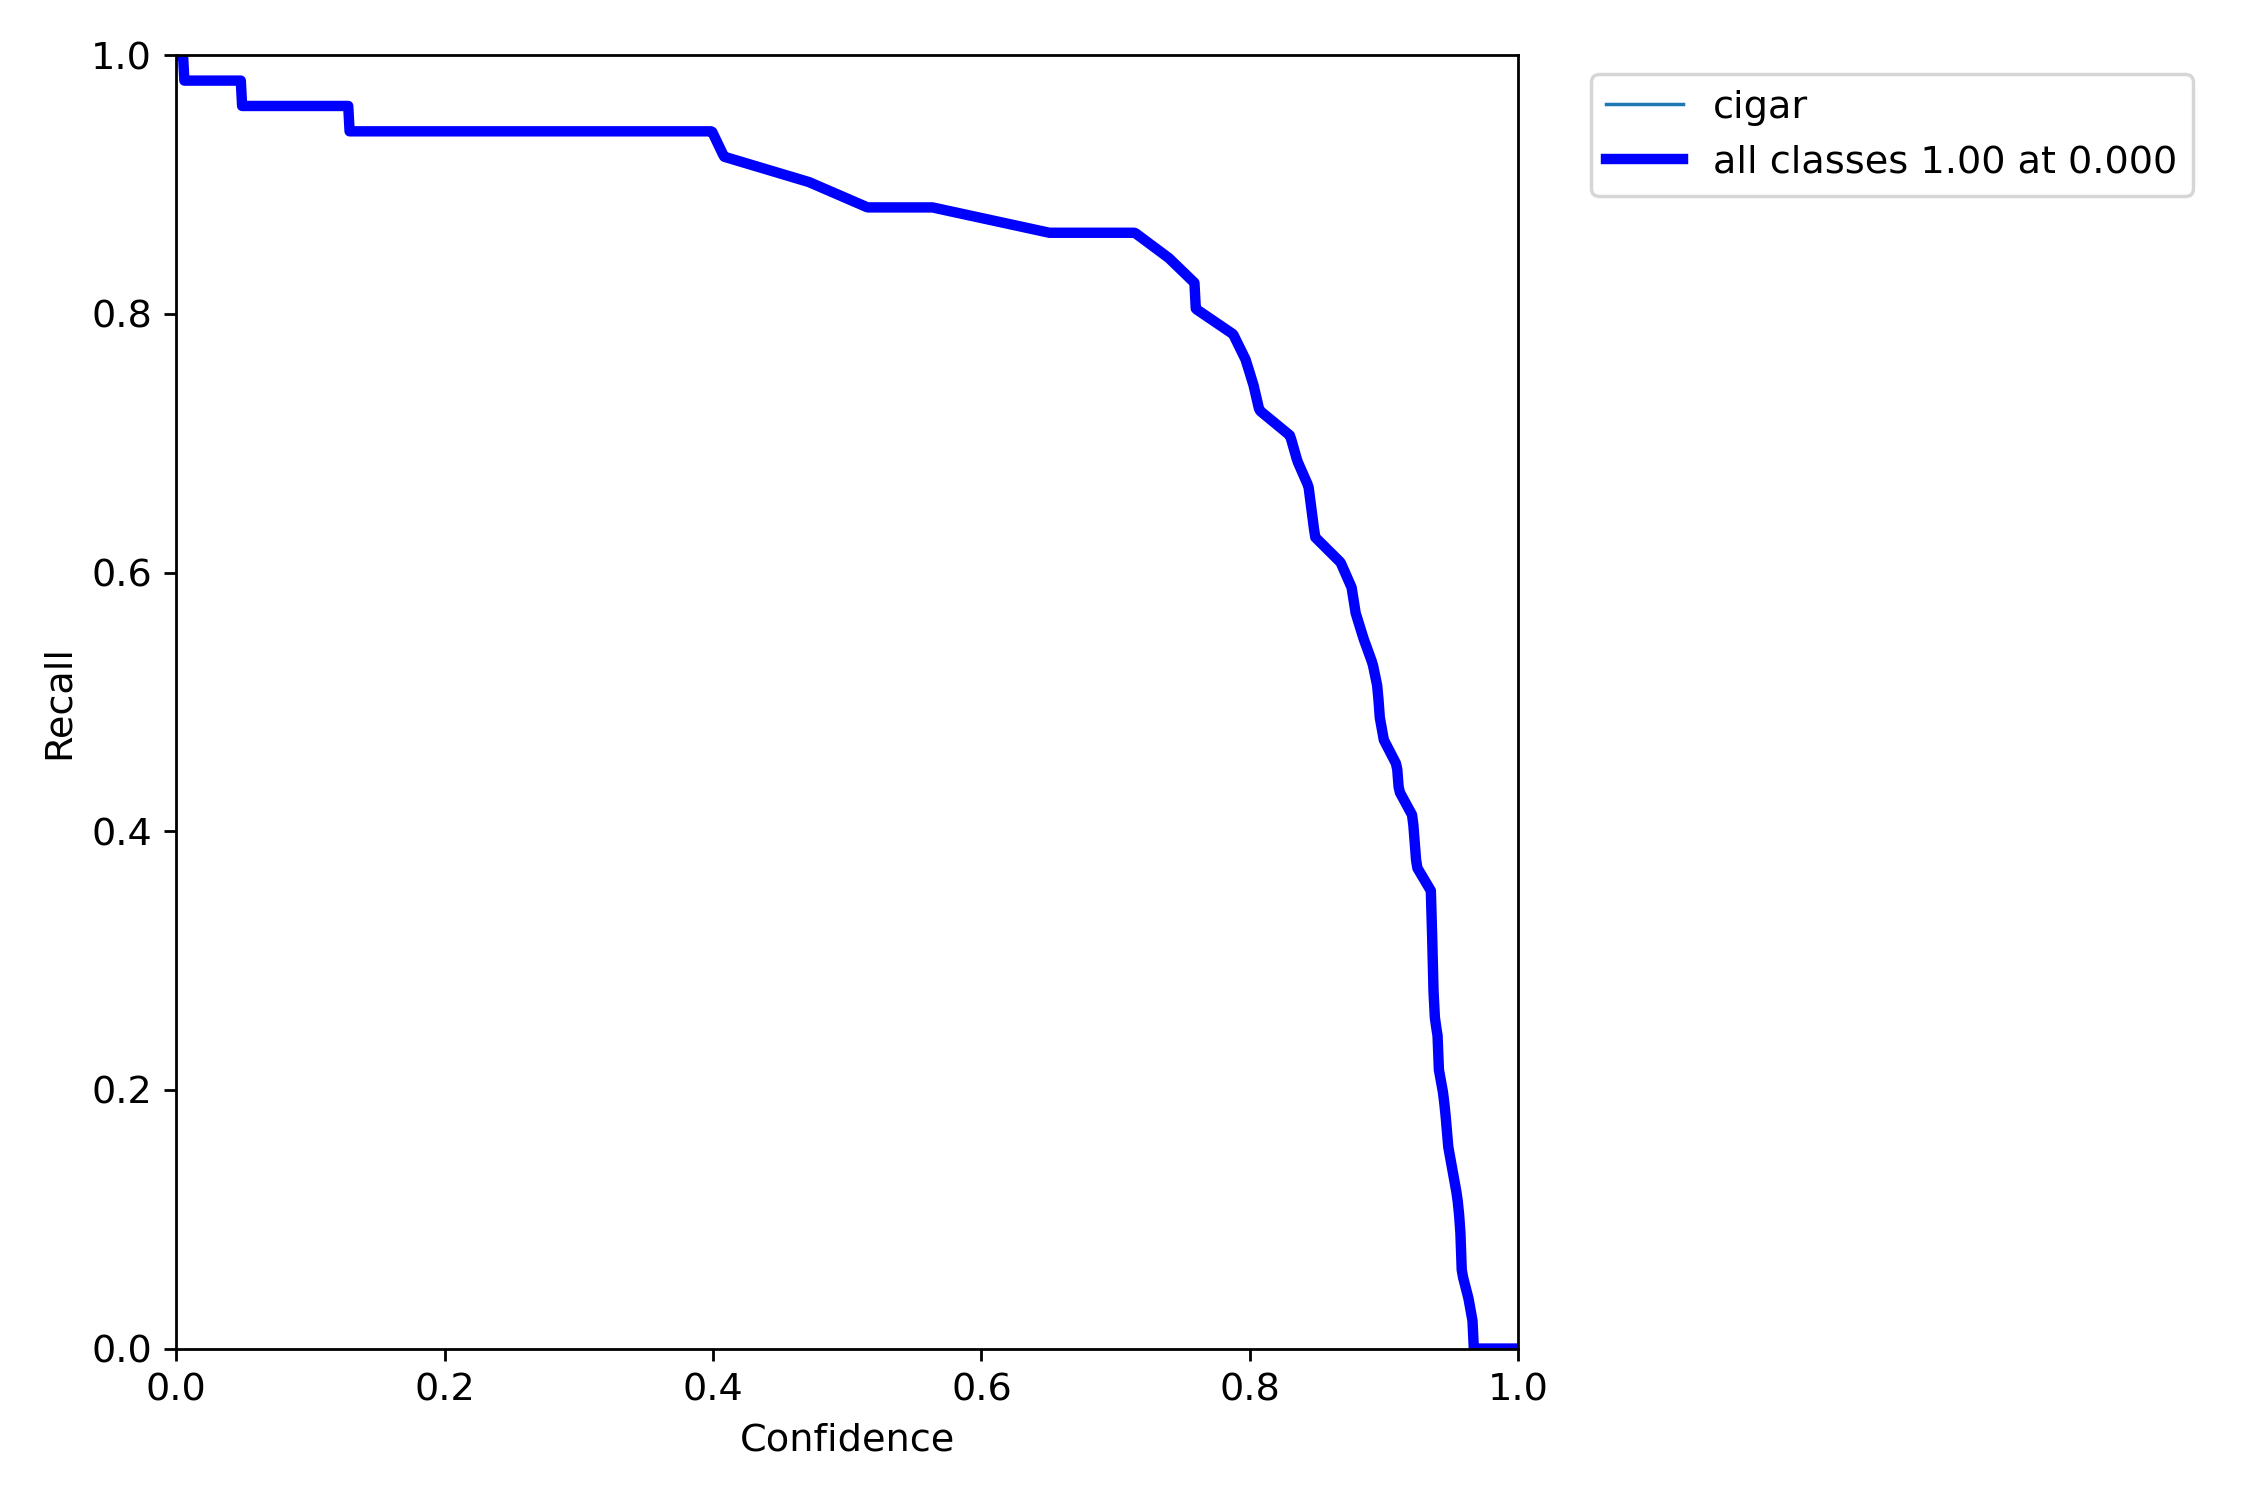

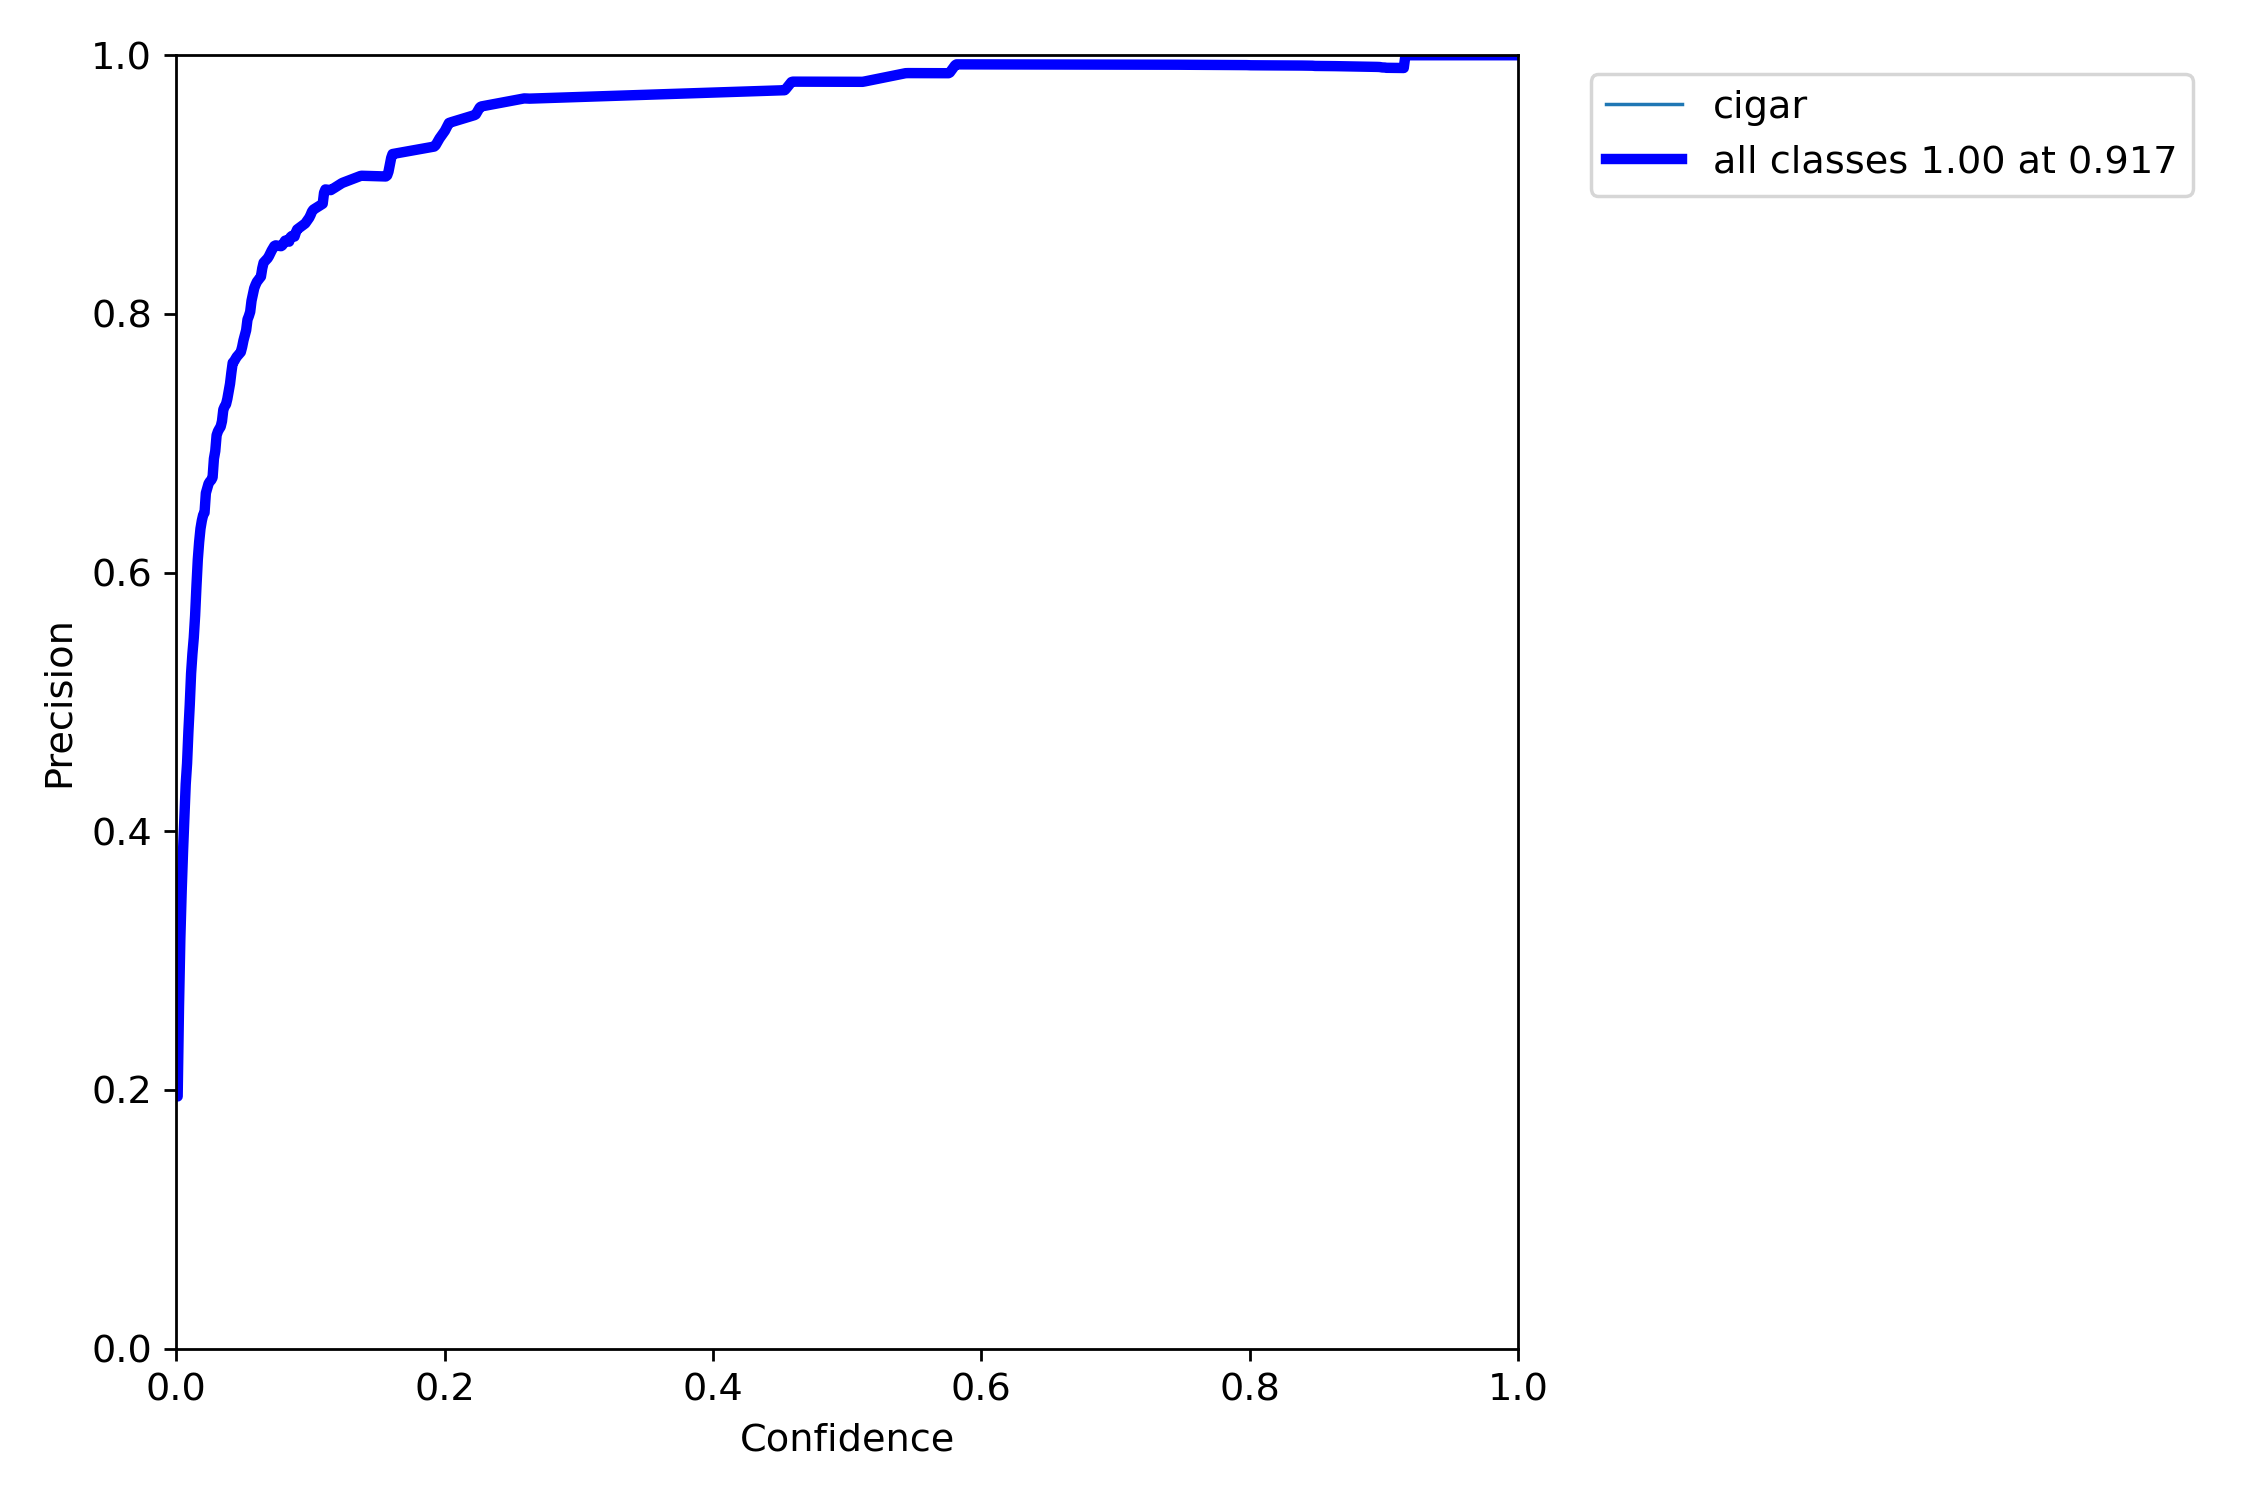

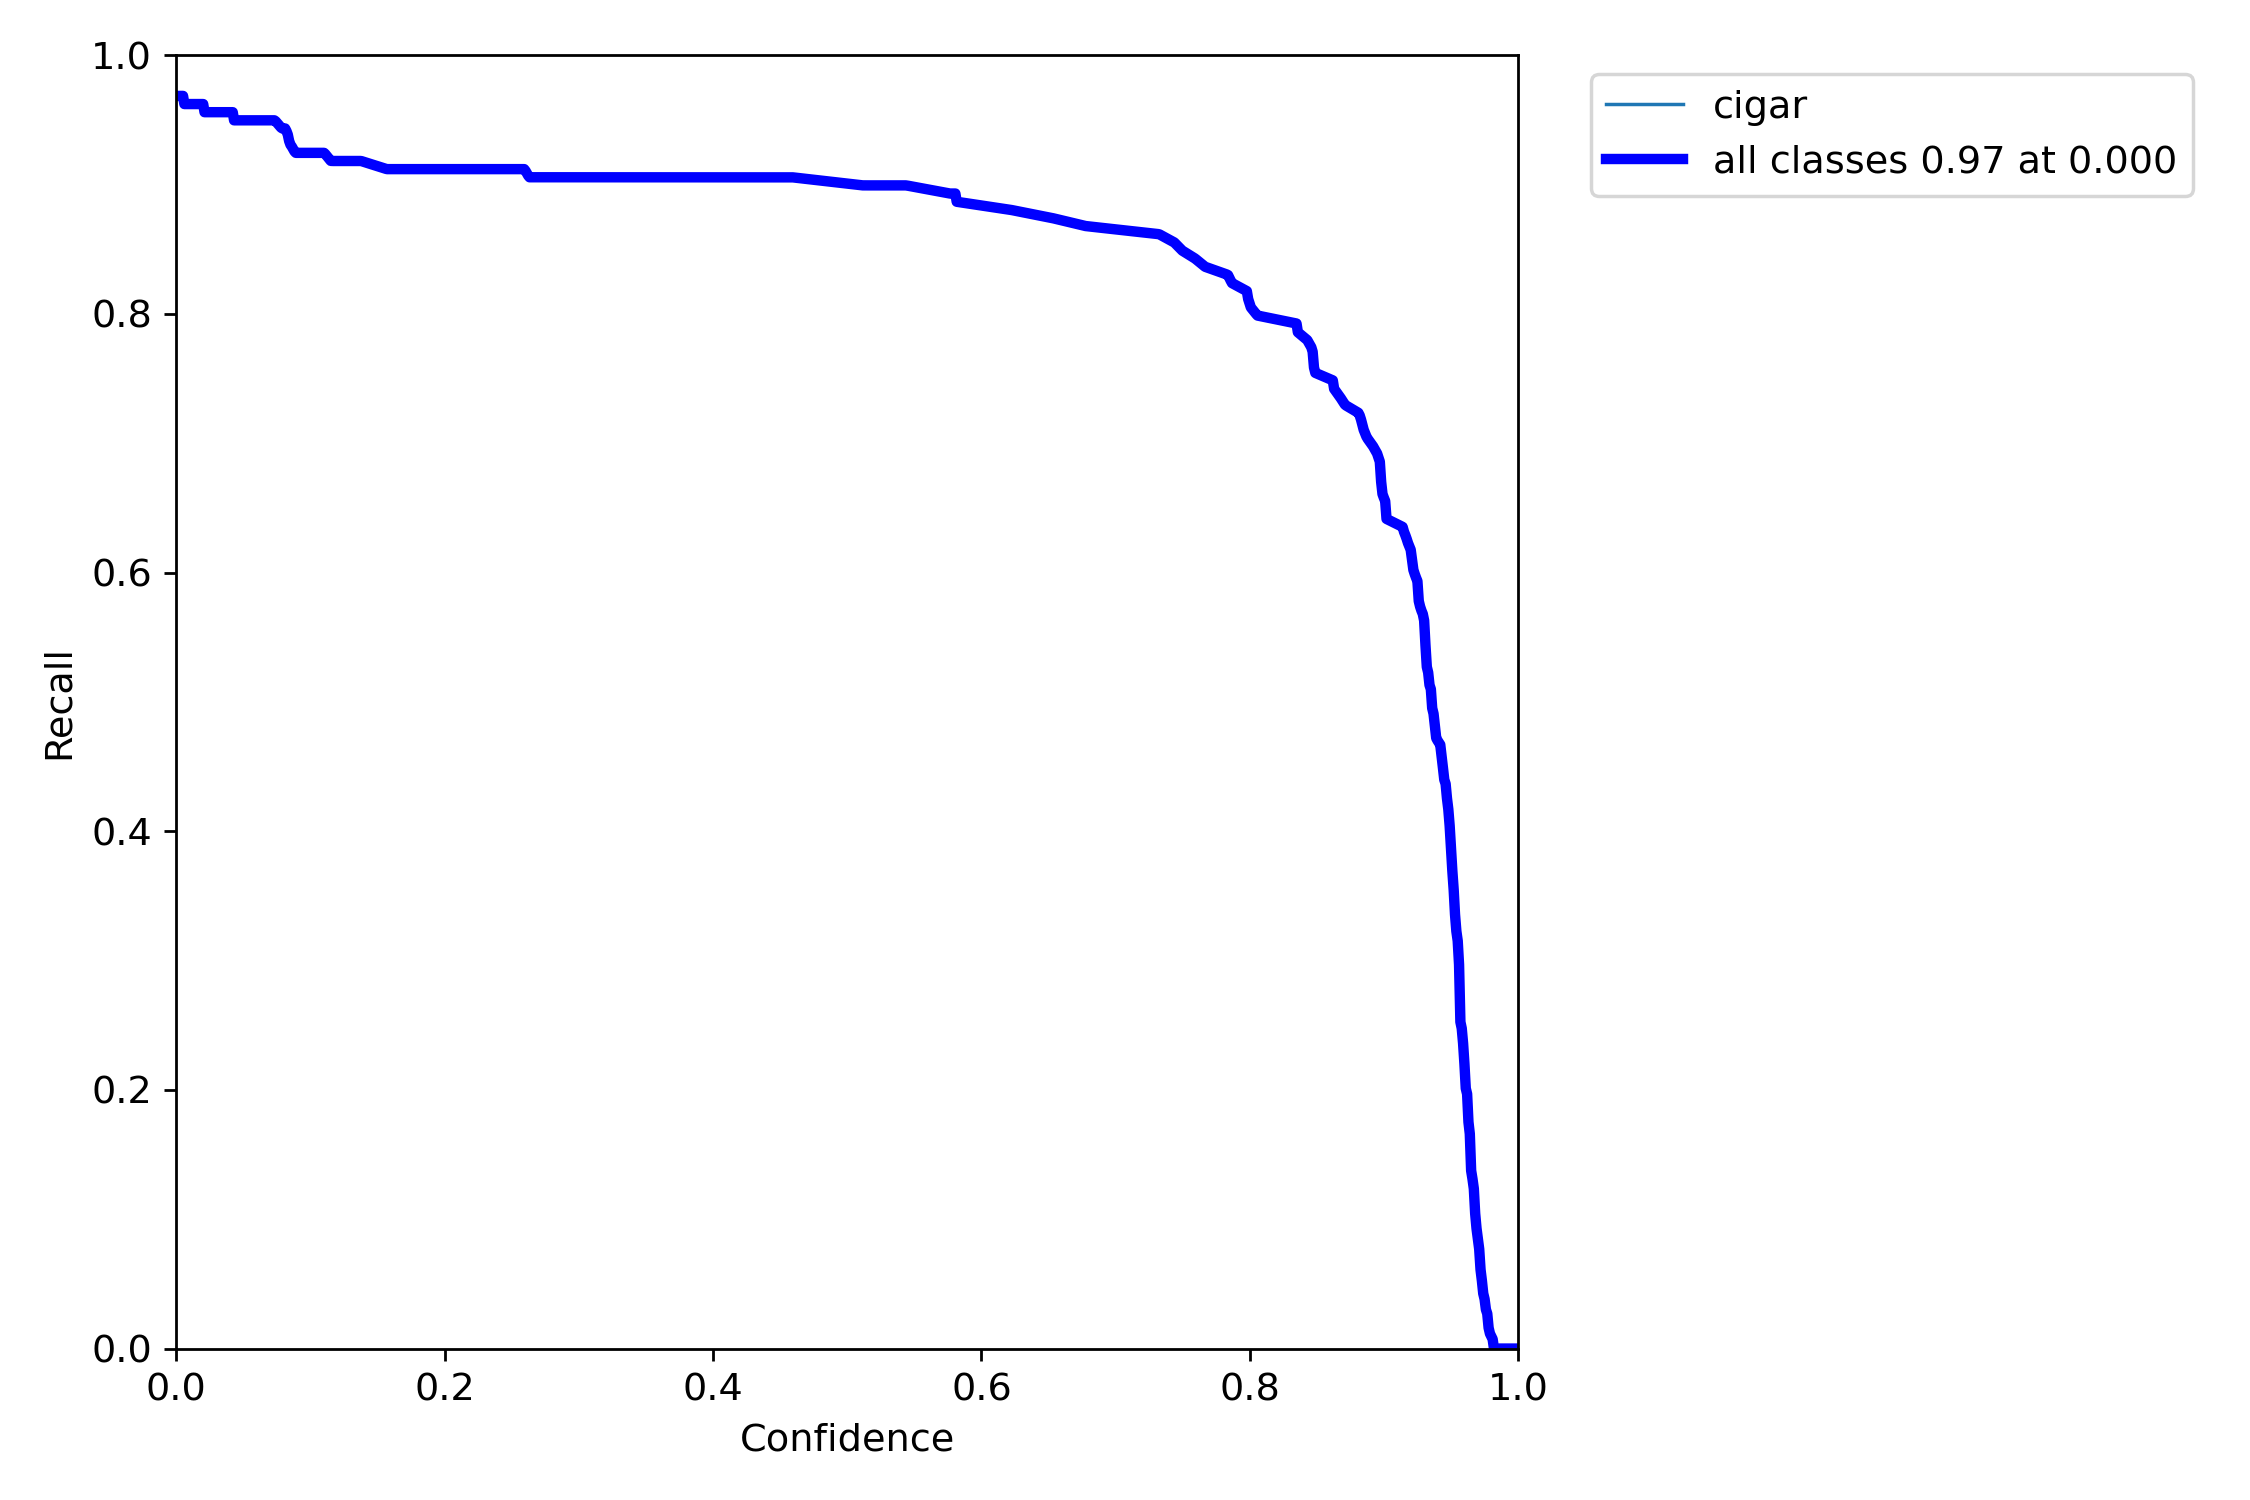

In [ ]:
display(Image("runs/train/yolov7_frozen50/P_curve.png", width=size, height=size))
display(Image("runs/train/yolov7_frozen50/R_curve.png", width=size, height=size))

display(Image("runs/train/yolov7_frz50_noise/P_curve.png", width=size, height=size))
display(Image("runs/train/yolov7_frz50_noise/R_curve.png", width=size, height=size))

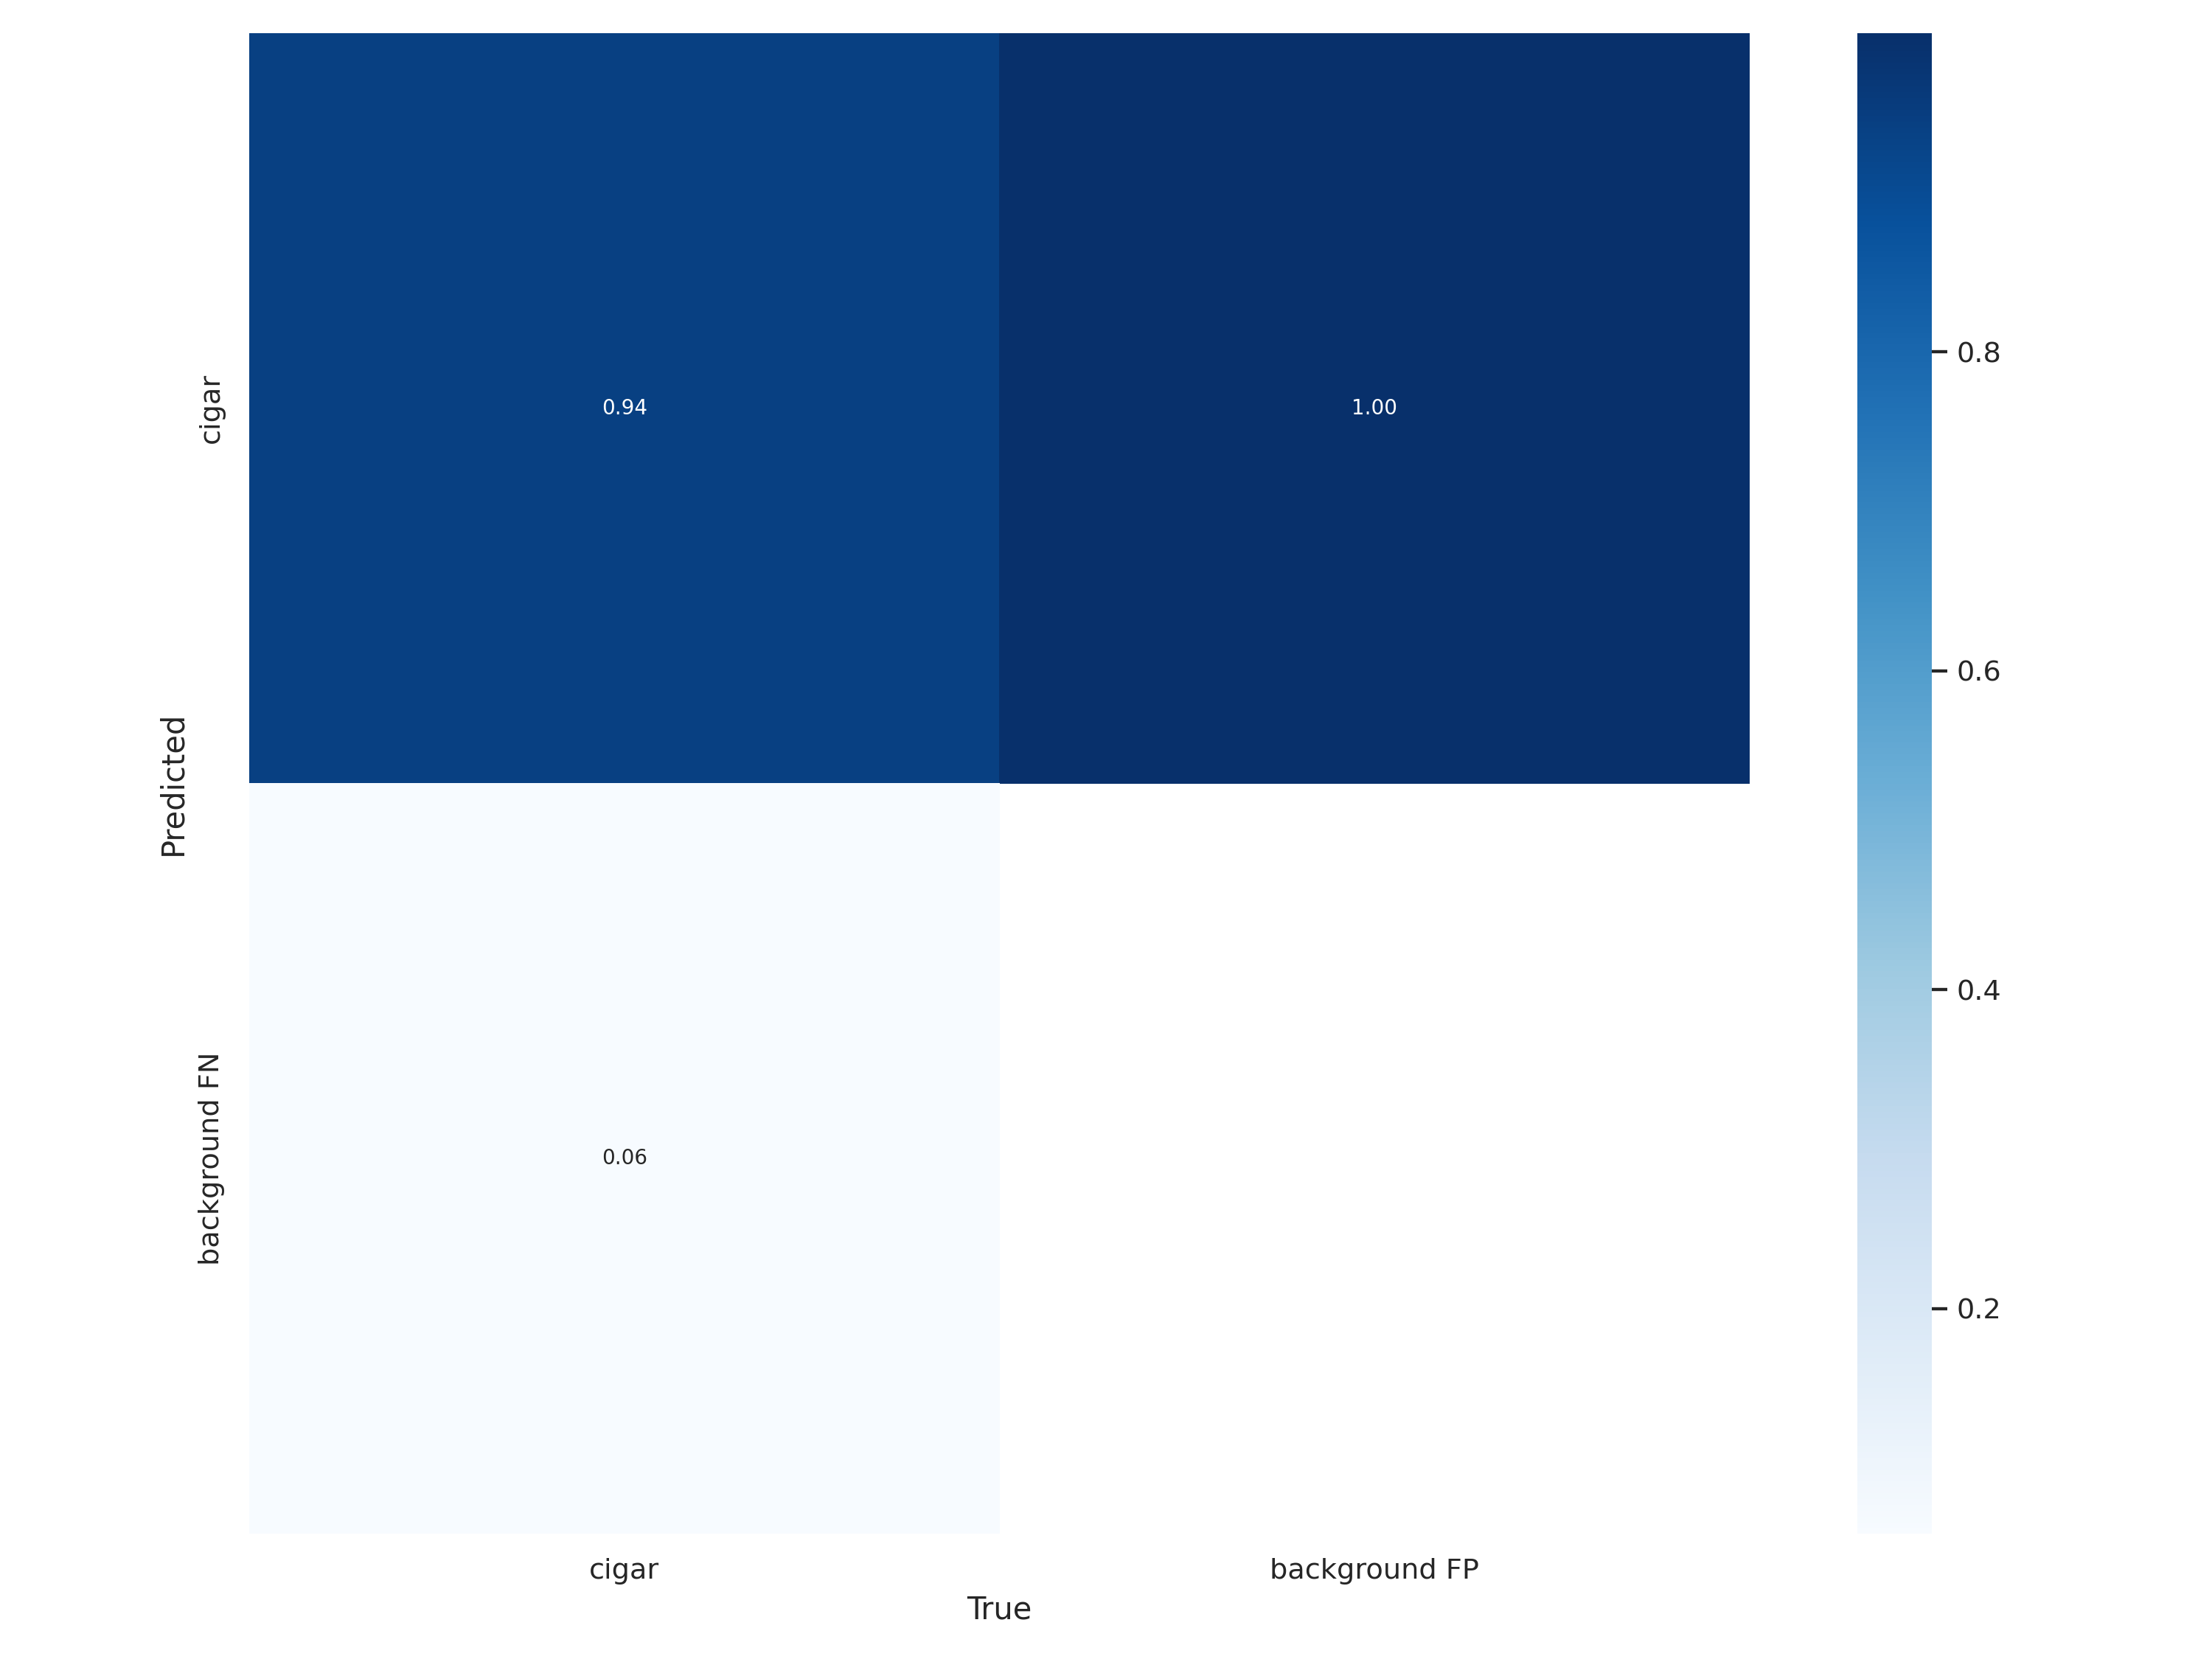

In [ ]:
# confusion matrix
display(Image("runs/train/yolov7_frozen50/confusion_matrix.png", width=500, height=500))

# Inference of the model on a Test image

In [ ]:
import os
import sys
sys.path.append('/content/gdrive/MyDrive/ColabSpace/yolov7')


import argparse
import time
from pathlib import Path
import cv2
import torch
import numpy as np
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
    scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized, TracedModel


def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

# Configuration Parameters

Change the path of both **weights** and **yaml** file

**weights** will be in yolov7 main folder -> runs -> train and then select the appropriate weight

**yaml** yolov7 main folder -> data, there you will find yaml file

In [ ]:
classes_to_filter = None  #You can give list of classes to filter by name, Be happy you don't have to put class number. ['train','person' ]


opt  = {
    
    "weights": "runs/train/yolov7_frz50_noise/weights/best.pt", # Path to weights file--------------------
    "yaml"   : "data/cigar_data.yaml", #Path to data.yaml
    "img-size": 640, # default image size
    "conf-thres": 0.25, # confidence threshold for inference.
    "iou-thres" : 0.45, # NMS IoU threshold for inference.
    "device" : '0',  # device to run our model i.e. 0 or 0,1,2,3 or cpu
    "classes" : classes_to_filter  # list of classes to filter or None

}

# Enter path of Source image

In [ ]:
# Give path of source image
source_image_path = '/content/gdrive/MyDrive/ColabSpace/yolov7/data/infer/val1.png'

In [ ]:
with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride
  imgsz = check_img_size(imgsz, s=stride)  # check img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

  img0 = cv2.imread(source_image_path)
  img = letterbox(img0, imgsz, stride=stride)[0]
  img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
  img = np.ascontiguousarray(img)
  img = torch.from_numpy(img).to(device)
  img = img.half() if half else img.float()  # uint8 to fp16/32
  img /= 255.0  # 0 - 255 to 0.0 - 1.0
  if img.ndimension() == 3:
    img = img.unsqueeze(0)

  # Inference
  t1 = time_synchronized()
  pred = model(img, augment= False)[0]

  # Apply NMS
  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:

      classes.append(opt['classes'].index(class_name))


  pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
  t2 = time_synchronized()
  for i, det in enumerate(pred):
    s = ''
    s += '%gx%g ' % img.shape[2:]  # print string
    gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
    if len(det):
      det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

      for c in det[:, -1].unique():
        n = (det[:, -1] == c).sum()  # detections per class
        s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
    
      for *xyxy, conf, cls in reversed(det):

        label = f'{names[int(cls)]} {conf:.2f}'
        #label = ""# uncomment if you only want to display bounding boxes
        plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)



Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


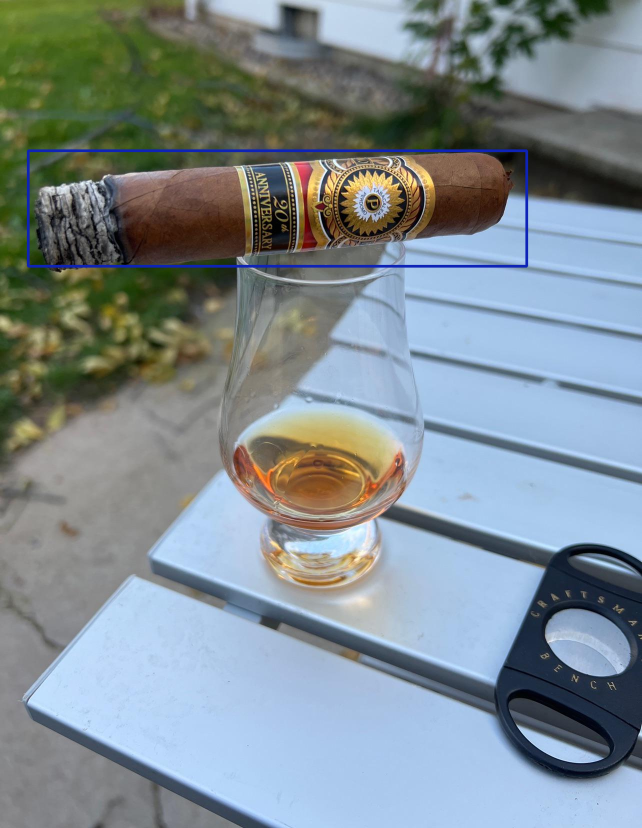

In [ ]:
from google.colab.patches import cv2_imshow

scale_percent = 50 # percent of original size
width = int(img0.shape[1] * scale_percent / 100)
height = int(img0.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized_img = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized_img)

In [ ]:
# !python detect.py --weights runs/train/yolov7_frozen50/weights/best.pt --img-size 640 --source data/test/val1.png --no-trace

# Test Set Evaluation

In [ ]:
!pwd

/content/gdrive/MyDrive/ColabSpace/yolov7


In [ ]:
#!python test.py --weights runs/train/yolov7_frozen50/weights/best.pt --data data/cigar_data_test.yaml --name xyzz --iou-thres=0.5 # cigar_data_test.yaml has the 'val' pointing to the test folder

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/cigar_data_test.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='xyzz', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['runs/train/yolov7_frozen50/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwarg

In [ ]:
!python test.py --weights runs/train/yolov7_frz50_noise/weights/best.pt --data data/cigar_data_test.yaml --name cigar_final_test --iou-thres=0.5 # cigar_data_test.yaml has the 'val' pointing to the test folder

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/cigar_data_test.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='cigar_final_test', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['runs/train/yolov7_frz50_noise/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(t

In [ ]:
def F1(cls,p,r):
  print("F1 score for class: "+cls+" = "+str(2*p*r/(p+r)))

In [ ]:
F1("cigar",0.987,0.98)

F1 score for class: cigar = 0.9834875444839858


#Detect on a folder of images

In [ ]:
#!python detect.py --weights runs/train/yolov7_frozen50/weights/best.pt  --conf 0.25 --img-size 640 --source ./data/test/images --name test_on_edicd_subreddit

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='test_on_edicd_subreddit', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='./data/test/images', update=False, view_img=False, weights=['runs/train/yolov7_frozen50/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[

In [ ]:
#!python detect.py --weights runs/train/yolov7_frozen50/weights/best.pt  --conf 0.6 --img-size 640 --source ./data/infer/vape --name vape --save-txt

In [ ]:
!python detect.py --weights runs/train/yolov7_frz50_noise/weights/best.pt  --conf 0.6 --img-size 640 --source ./data/infer/raw_images_pen --name pens_noise --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='pens_noise', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='./data/infer/raw_images_pen', update=False, view_img=False, weights=['runs/train/yolov7_frz50_noise/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (2441.6ms

In [ ]:
!python detect.py --weights runs/train/yolov7_frz50_noise/weights/best.pt  --conf 0.6 --img-size 640 --source ./data/infer/raw_images_Cigarettes --name cigs_noise --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='cigs_noise', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='./data/infer/raw_images_Cigarettes', update=False, view_img=False, weights=['runs/train/yolov7_frz50_noise/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (1

In [ ]:
!python detect.py --weights runs/train/yolov7_frz50_noise/weights/best.pt  --conf 0.6 --img-size 640 --source ./data/infer/raw_images_VapePorn --name vapes_noise --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='vapes_noise', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='./data/infer/raw_images_VapePorn', update=False, view_img=False, weights=['runs/train/yolov7_frz50_noise/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (18